# Ejemplo de datos no balanceados

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

np.random.seed(123)

Usaremos un conjunto de datos para detectar fraudes en tarjetas de crédito ([enlace](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)).

In [10]:
df = pd.read_csv("creditcard.csv") 
print(df.shape)
print(pd.Series(df['Class']).value_counts(sort = True))

(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


Vemos que la clase minoritaria representa menos del 0,2% del total de datos.

Text(0, 0.5, 'Frecuencia')

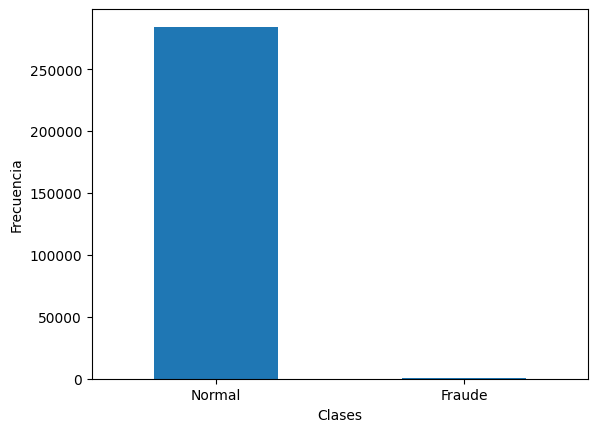

In [11]:
clases = pd.Series(df['Class']).value_counts(sort = True)
clases.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ("Normal", "Fraude"))
plt.xlabel("Clases")
plt.ylabel("Frecuencia")

## Entrenando el modelo sin retocar

In [12]:
# definimos las clases
y = df['Class']
X = df.drop('Class', axis=1)
# y generamos los conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)


def run_model(X_train, y_train):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=448,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
# ejecutamos el modelo 
model = run_model(X_train, y_train)

c:\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Y mostramos los resultados

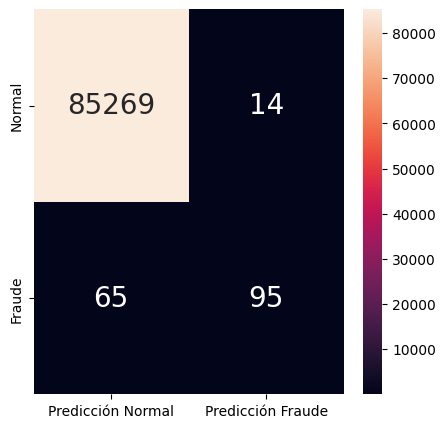

              precision    recall  f1-score   support

           0     0.9992    0.9998    0.9995     85283
           1     0.8716    0.5938    0.7063       160

    accuracy                         0.9991     85443
   macro avg     0.9354    0.7968    0.8529     85443
weighted avg     0.9990    0.9991    0.9990     85443



In [13]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, xticklabels=("Predicción Normal", "Predicción Fraude"), yticklabels=("Normal", "Fraude"), annot=True, fmt="d", annot_kws={"size":20});
    plt.show()
    print (classification_report(y_test, pred_y, digits=4))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

# Test con un conjunto balanceado

In [14]:
# muestras que tendrán ambas variables
tam = 150

# Obtener índices de instancias de clase 0 y clase 1
index0 = y_test[y_test == 0].index
index1 = y_test[y_test == 1].index

# Muestreo aleatorio de instancias de cada clase
sample0 = index0[:tam]
sample1 = index1[:tam]

# Concatenar los índices de las dos clases
conjunto_balanceado = sample0.append(sample1)

# Seleccionar las instancias balanceadas del conjunto de prueba original
X_test_balanceado = X_test.loc[conjunto_balanceado]
y_test_balanceado = y_test.loc[conjunto_balanceado]

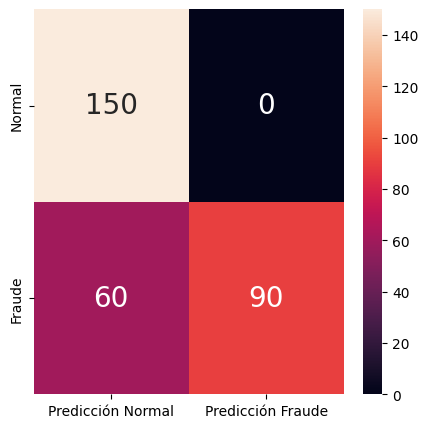

              precision    recall  f1-score   support

           0     0.7143    1.0000    0.8333       150
           1     1.0000    0.6000    0.7500       150

    accuracy                         0.8000       300
   macro avg     0.8571    0.8000    0.7917       300
weighted avg     0.8571    0.8000    0.7917       300



In [15]:
pred_y = model.predict(X_test_balanceado)
mostrar_resultados(y_test_balanceado, pred_y)